In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

from HW2.benchmark_proceeder import BenchmarkStorage
from HW2.error_calculator import AbsErrorCalculator
from HW2.regression_generator import generate_regression
from HW2.sgd import sgd, minibatch_gd, gd
from HW2.visualization import visualize_regression_point, visualize_line, draw_levels

[-5.22354779 30.63308532]


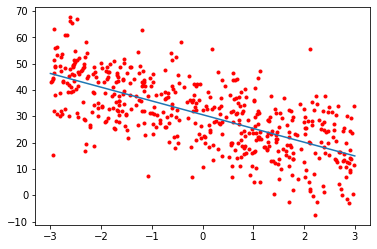

In [2]:
f, points, f_ab = generate_regression(f_scale=50, point_count=500, scale=np.array([3, 10]))

print(f_ab)

visualize_regression_point(f, points, scale=3)

In [3]:
storage = BenchmarkStorage()

# SGD

[-6.05806424 31.44861411]
Benchmark results for config <('sgd', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.224901
Mean memory:0.0B
Mean SMAPE value:0.16352843351921237
Mean RMSE value:10.296399830537075
Mean logcosh value:7.537475738590629
Mean gradient calls:1417.0
Iterations done:1417.0


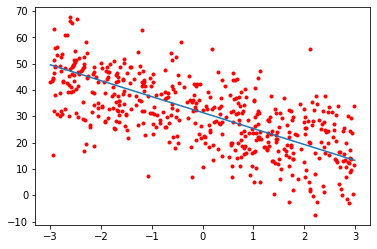

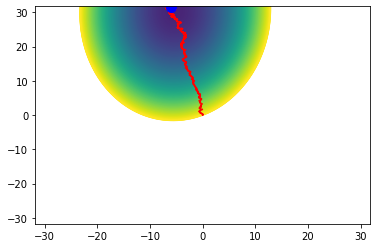

In [4]:
index = storage.add_benchmark_config()
ab, meta = sgd(points)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

#### Наблюдения
* `1` вызов градта за итерацию
* Точность плохая т.к. один градиент из суммы описывает очень плохо градиент суммы
* Градиент м/у итерациями сильно "прыгает"

# Minibatch GD
batch size = `[10, 50, 100]`

## 10

[-5.61062529 28.7208023 ]
Benchmark results for config <('mini10', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.473618
Mean memory:0.0B
Mean SMAPE value:0.16725883887285456
Mean RMSE value:10.312299923738031
Mean logcosh value:7.632821354021316
Mean gradient calls:7770.0
Iterations done:777.0


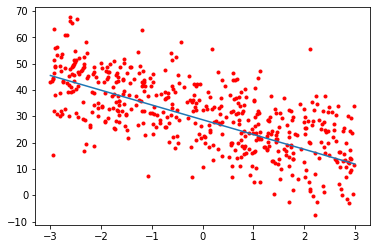

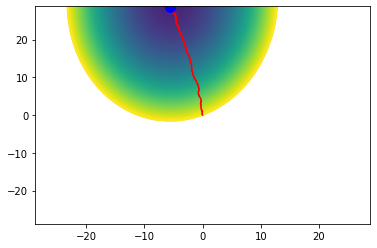

In [5]:
index = storage.add_benchmark_config(batch_size='mini10')
ab, meta = minibatch_gd(points, batch_size=10)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

## 50

[-5.4027204  28.40781895]
Benchmark results for config <('mini50', 1, Default(no) optimization, Squared error calculator)>:
Mean time:1.53294
Mean memory:0.0B
Mean SMAPE value:0.167562662338562
Mean RMSE value:10.352178435690151
Mean logcosh value:7.672248061070594
Mean gradient calls:37550.0
Iterations done:751.0


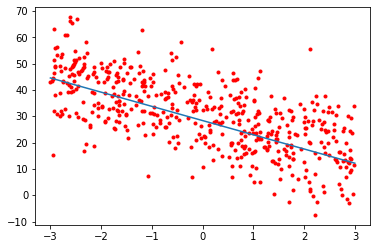

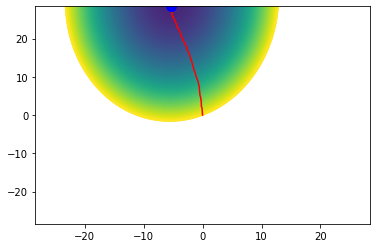

In [6]:
index = storage.add_benchmark_config(batch_size='mini50')
ab, meta = minibatch_gd(points, batch_size=50)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

## 100

[-5.3835999 28.5468523]
Benchmark results for config <('mini100', 1, Default(no) optimization, Squared error calculator)>:
Mean time:2.93135
Mean memory:0.0B
Mean SMAPE value:0.16699604117327305
Mean RMSE value:10.32407492712753
Mean logcosh value:7.650941037508561
Mean gradient calls:76600.0
Iterations done:766.0


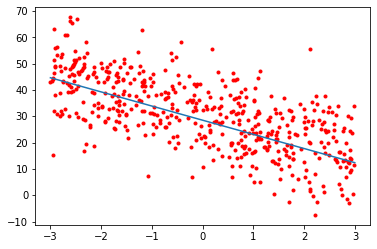

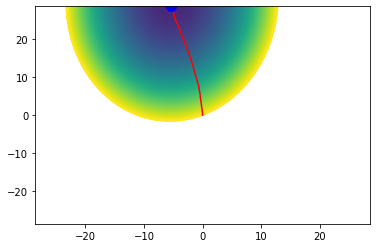

In [7]:
index = storage.add_benchmark_config(batch_size='mini100')
ab, meta = minibatch_gd(points, batch_size=100)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

#### Наблюдения
* `k` вызовов градта за итерацию
* Точность лучше т.к. `k` градиентов из суммы лучше описывает градиент суммы
* Градиент м/у итерациями меньше "прыгает"/почти не "прыгает"

# GD

[-5.27646192 28.12434424]
Benchmark results for config <('gd', 1, Default(no) optimization, Squared error calculator)>:
Mean time:13.200635
Mean memory:0.0B
Mean SMAPE value:0.16829137291267024
Mean RMSE value:10.408448391003624
Mean logcosh value:7.72229711178481
Mean gradient calls:365500.0
Iterations done:731.0


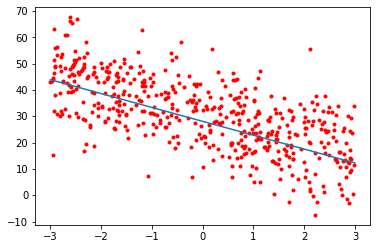

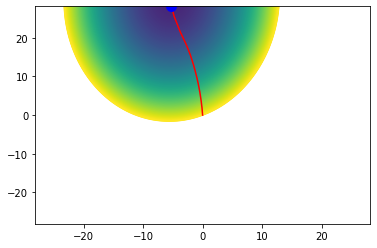

In [8]:
index = storage.add_benchmark_config(batch_size='gd')
ab, meta = gd(points)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

#### Наблюдения
* `n` вызовов градта за итерацию
* Точность лучше т.к. градиент всей функции
* Градиент м/у итерациями меньше "прыгает"/почти не "прыгает"

# Benchmark

In [10]:
batch_sizes = [1, 10, 25, 100, 250, 500]

result = np.array([])
for batch_size in tqdm(batch_sizes, "Batch sizes", position=2):
    index = storage.add_benchmark_config(batch_size=str(batch_size))
    for _ in range(20 if batch_size != len(points) else 1):
        ab, meta = minibatch_gd(points, batch_size=batch_size)
    storage.add_benchmark_result(index, meta)
    result = np.append(result, storage.get_benchmark_results_arrayed(index))

result

Batch sizes:   0%|          | 0/6 [00:00<?, ?it/s]

array([('1', 1, Default(no) optimization, Squared error calculator),
       0.086541, '0.0B', 0.1929415743501663, 11.248847702500628,
       8.397998813733501, 560.0, 560.0,
       ('10', 1, Default(no) optimization, Squared error calculator),
       0.388356, '0.0B', 0.17020563440134454, 10.52227409391362,
       7.815241400226772, 6870.0, 687.0,
       ('25', 1, Default(no) optimization, Squared error calculator),
       0.813253, '0.0B', 0.16881281336382817, 10.47759399760983,
       7.790585786633144, 17475.0, 699.0,
       ('100', 1, Default(no) optimization, Squared error calculator),
       3.045257, '0.0B', 0.1686356236753545, 10.436476328994166,
       7.747292839472399, 71700.0, 717.0,
       ('250', 1, Default(no) optimization, Squared error calculator),
       6.462644, '0.0B', 0.1684866235680517, 10.42265354533606,
       7.734563635384598, 180750.0, 723.0,
       ('500', 1, Default(no) optimization, Squared error calculator),
       13.49543, '0.0B', 0.16828973027773805, 

In [11]:
result = result.reshape((-1, 8))
df = pd.DataFrame(result, columns=[
    'Config',
    'Mean time',
    'Mean mem',
    'Mean SMAPE',
    'Mean RMSE',
    'Mean logcosh',
    'Mean gradient calls',
    'Mean iterations'
])
df.to_csv("data/2.1.csv", sep='\t')
df

,Config,Mean time,Mean mem,Mean SMAPE,Mean RMSE,Mean logcosh,Mean gradient calls,Mean iterations
0,"(1, 1, Default(no) optimization, Squared error...",0.086541,0.0B,0.192942,11.248848,8.397999,560.0,560.0
1,"(10, 1, Default(no) optimization, Squared erro...",0.388356,0.0B,0.170206,10.522274,7.815241,6870.0,687.0
2,"(25, 1, Default(no) optimization, Squared erro...",0.813253,0.0B,0.168813,10.477594,7.790586,17475.0,699.0
3,"(100, 1, Default(no) optimization, Squared err...",3.045257,0.0B,0.168636,10.436476,7.747293,71700.0,717.0
4,"(250, 1, Default(no) optimization, Squared err...",6.462644,0.0B,0.168487,10.422654,7.734564,180750.0,723.0
5,"(500, 1, Default(no) optimization, Squared err...",13.49543,0.0B,0.16829,10.408303,7.722163,365500.0,731.0
